In [1]:
import numpy as np, tensorflow as tf, matplotlib.pyplot as plt, cv2, keras, seaborn, os

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

In [2]:
w, h = 150, 150

In [3]:
(X_MNIST_1, y_MNIST_1), (X_MNIST_2, y_MNIST_2) = mnist.load_data()

print(f'X_MNIST_1 : {X_MNIST_1.shape}\ny_MNIST_1 : {y_MNIST_1.shape}\n\nX_MNIST_2: {X_MNIST_2.shape}\ny_MNIST_2: {y_MNIST_2.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_MNIST_1 : (60000, 28, 28)
y_MNIST_1 : (60000,)

X_MNIST_2: (10000, 28, 28)
y_MNIST_2: (10000,)


In [4]:
X_MNIST_combined = np.concatenate((X_MNIST_1, X_MNIST_2), axis=0)
y_MNIST_combined = np.concatenate((y_MNIST_1, y_MNIST_2), axis=0)

X_MNIST_filtered = X_MNIST_combined[y_MNIST_combined != 0]
y_MNIST_filtered = y_MNIST_combined[y_MNIST_combined != 0]

samples_per_class = 800
X_MNIST_balanced = []
y_MNIST_balanced = []

for digit in range(1, 10):
    indices = np.where(y_MNIST_filtered == digit)[0]
    selected_indices = np.random.choice(indices, size=samples_per_class, replace=False)
    
    # Resize setiap gambar secara individu
    resized_images = [cv2.resize(X_MNIST_filtered[idx], (w, h)) for idx in selected_indices]
    
    X_MNIST_balanced.extend(resized_images)
    y_MNIST_balanced.extend(y_MNIST_filtered[selected_indices])

# Ubah menjadi array numpy
X_MNIST_balanced = np.array(X_MNIST_balanced)
y_MNIST_balanced = np.array(y_MNIST_balanced)

print(f"X_balanced shape: {X_MNIST_balanced.shape}")
print(f"y_balanced shape: {y_MNIST_balanced.shape}") 

X_balanced shape: (7200, 150, 150)
y_balanced shape: (7200,)


In [5]:
FOLDER_PATH = '/kaggle/input/printed-digits-dataset/assets'
X_PrintDigit = []
y_PrintDigit = []

for label in os.listdir(FOLDER_PATH):
    if label not in ['0', '10']:
        label_path = os.path.join(FOLDER_PATH, label)
        print(label_path)
        if os.path.isdir(label_path):
            for image_name in os.listdir(label_path):
                image_path = os.path.join(label_path, image_name)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                image = cv2.resize(image, (w, h))                  
                if image is not None:
                    X_PrintDigit.append(image)
                    y_PrintDigit.append(int(label))

X_PrintDigit = np.array(X_PrintDigit)
y_PrintDigit = np.array(y_PrintDigit)
print(f'\nX_PrintDigit : {X_PrintDigit.shape}\ny_PrintDigit : {y_PrintDigit.shape}')

/kaggle/input/printed-digits-dataset/assets/7
/kaggle/input/printed-digits-dataset/assets/2
/kaggle/input/printed-digits-dataset/assets/5
/kaggle/input/printed-digits-dataset/assets/8
/kaggle/input/printed-digits-dataset/assets/3
/kaggle/input/printed-digits-dataset/assets/1
/kaggle/input/printed-digits-dataset/assets/4
/kaggle/input/printed-digits-dataset/assets/9
/kaggle/input/printed-digits-dataset/assets/6

X_PrintDigit : (5658, 150, 150)
y_PrintDigit : (5658,)


In [6]:
FOLDER_PATH = '/kaggle/input/black-and-white-number/assets_v2'
X_BlackWhite = []
y_BlackWhite = []

for label in os.listdir(FOLDER_PATH):
    if label not in ['0', '10']:
        label_path = os.path.join(FOLDER_PATH, label)
        print(label_path)
        if os.path.isdir(label_path):
            for image_name in os.listdir(label_path):
                image_path = os.path.join(label_path, image_name)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                image = cv2.resize(image, (w, h))                  
                if image is not None:
                    X_BlackWhite.append(image)
                    y_BlackWhite.append(int(label))

X_BlackWhite = np.array(X_BlackWhite)
y_BlackWhite = np.array(y_BlackWhite)
print(f'\nX_BlackWhite : {X_BlackWhite.shape}\ny_BlackWhite : {y_BlackWhite.shape}')

/kaggle/input/black-and-white-number/assets_v2/7
/kaggle/input/black-and-white-number/assets_v2/2
/kaggle/input/black-and-white-number/assets_v2/5
/kaggle/input/black-and-white-number/assets_v2/8
/kaggle/input/black-and-white-number/assets_v2/3
/kaggle/input/black-and-white-number/assets_v2/1
/kaggle/input/black-and-white-number/assets_v2/4
/kaggle/input/black-and-white-number/assets_v2/9
/kaggle/input/black-and-white-number/assets_v2/6

X_BlackWhite : (7256, 150, 150)
y_BlackWhite : (7256,)


In [7]:
X_Kaggle = np.concatenate((X_PrintDigit, X_BlackWhite), axis=0)
y_Kaggle = np.concatenate((y_PrintDigit, y_BlackWhite), axis=0)

X_Kaggle, y_Kaggle = shuffle(X_Kaggle, y_Kaggle, random_state=42)

In [8]:
X = np.concatenate((X_MNIST_balanced, X_Kaggle), axis=0)
y = np.concatenate((y_MNIST_balanced, y_Kaggle), axis=0)

X, y = shuffle(X, y, random_state=42)

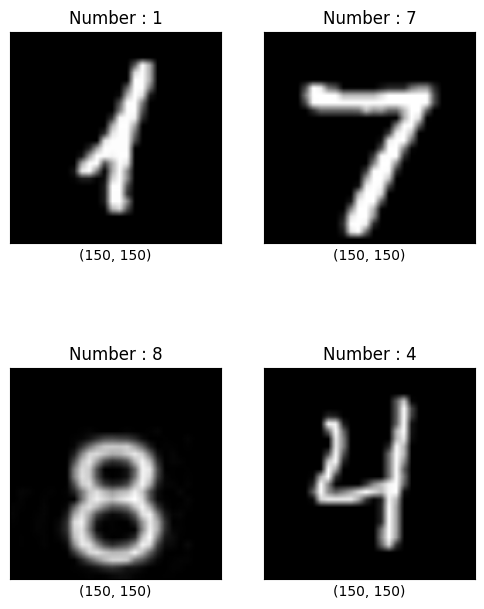

In [9]:
plt.figure(figsize=(6, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(X[i], cmap='gray')
    plt.title(f'Number : {y[i]}')
    plt.xlabel(X[i].shape)
    plt.xticks([])
    plt.yticks([])
    plt.plot()

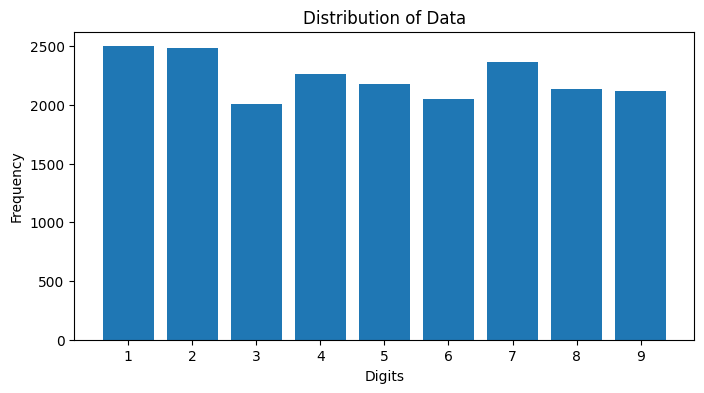

In [10]:
count = np.bincount(y)[1:]

plt.figure(figsize=(8, 4))
plt.bar(x=np.arange(9), height=count)
plt.xticks(ticks=np.arange(9), labels=np.arange(1, 10))
plt.title("Distribution of Data")
plt.xlabel("Digits")
plt.ylabel("Frequency")
plt.show()

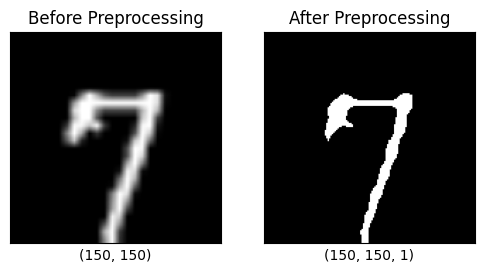

In [11]:
def image_preprocessing(image):  
    image = cv2.resize(image, (w, h))
    image = cv2.equalizeHist(image)
    _, binary_image = cv2.threshold(image, 180, 255, cv2.THRESH_BINARY)
    binary_image = binary_image.reshape(w, h, 1)
    binary_image = binary_image / 255.0
    return binary_image

target = X[991]

plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.title('Before Preprocessing')
plt.xlabel(f'{target.shape}')
plt.imshow(target, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.title('After Preprocessing')
target_pre = image_preprocessing(target)
plt.xlabel(f'{target_pre.shape}')
plt.imshow(target_pre, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [12]:
def preprocess_mnist_images(images):
    return np.array([image_preprocessing(img) for img in images])

X = np.array([image_preprocessing(img) for img in X])

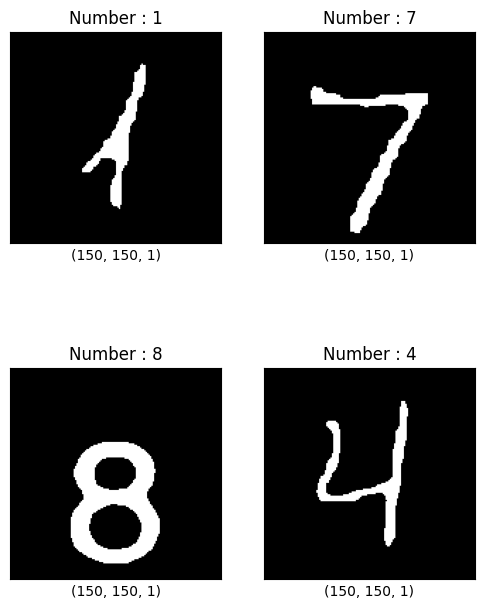

In [13]:
plt.figure(figsize=(6, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(X[i], cmap='gray')
    plt.title(f'Number : {y[i]}')
    plt.xlabel(X[i].shape)
    plt.xticks([])
    plt.yticks([])
    plt.plot()

In [14]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (20114, 150, 150, 1)
y shape: (20114,)


In [15]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=.5, random_state=42)

In [16]:
dataGen = ImageDataGenerator(width_shift_range=.1, height_shift_range=.1, zoom_range=.2, shear_range=.1, rotation_range=10)

dataGen.fit(X_train)

In [17]:
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

In [18]:
print(f'X_train : {X_train.shape}\ny_train : {y_train.shape}\n\nX_val: {X_val.shape}\ny_val: {y_val.shape}\n\nX_test: {X_test.shape}\ny_test: {y_test.shape}')

X_train : (16091, 150, 150, 1)
y_train : (16091, 10)

X_val: (2012, 150, 150, 1)
y_val: (2012, 10)

X_test: (2011, 150, 150, 1)
y_test: (2011, 10)


In [19]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(w, h, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 17, 17, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 73984)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     9,470,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,841,034 (37.54 MB)

 Trainable params: 9,841,034 (37.54 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) 

In [22]:
history = model.fit(dataGen.flow(X_train, y_train), epochs=100, steps_per_epoch=300, validation_data=(X_val, y_val), shuffle=1, callbacks=[early_stopping])    

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733557425.535429      90 service.cc:145] XLA service 0x78ca1000c440 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733557425.535495      90 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733557425.535500      90 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  3/300 ━━━━━━━━━━━━━━━━━━━━ 15s 54ms/step - accuracy: 0.0590 - loss: 2.3288

I0000 00:00:1733557434.124583      90 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


300/300 ━━━━━━━━━━━━━━━━━━━━ 30s 65ms/step - accuracy: 0.3767 - loss: 1.7569 - val_accuracy: 0.8499 - val_loss: 0.4979
Epoch 2/100
202/300 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.7041 - loss: 0.8431

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


300/300 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.7133 - loss: 0.8196 - val_accuracy: 0.9170 - val_loss: 0.2708
Epoch 3/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 17s 56ms/step - accuracy: 0.7876 - loss: 0.6310 - val_accuracy: 0.9453 - val_loss: 0.1794
Epoch 4/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.8274 - loss: 0.5153 - val_accuracy: 0.9498 - val_loss: 0.1799
Epoch 5/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - accuracy: 0.8612 - loss: 0.4348 - val_accuracy: 0.9607 - val_loss: 0.1385
Epoch 6/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.8685 - loss: 0.3984 - val_accuracy: 0.9662 - val_loss: 0.1161
Epoch 7/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - accuracy: 0.8861 - loss: 0.3512 - val_accuracy: 0.9687 - val_loss: 0.1076
Epoch 8/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8927 - loss: 0.3295 - val_accuracy: 0.9722 - val_loss: 0.0992
Epoch 9/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - accuracy: 0.8970 - loss: 0.3093 - val_

In [23]:
model.save('/kaggle/working/num_classifier_150.h5')

In [24]:
model = tf.keras.models.load_model('/kaggle/working/num_classifier_150.h5')

In [25]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9798 - loss: 0.0686


[0.07414054870605469, 0.9801093935966492]

In [26]:
y_pred = model.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


<Axes: >

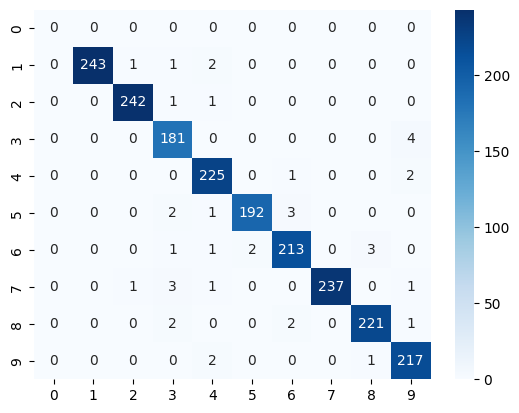

In [27]:
y_test_labels = [np.argmax(i) for i in y_test]
y_pred_labels = [np.argmax(i) for i in y_pred]


confusion_matrix = tf.math.confusion_matrix(labels=y_test_labels, predictions=y_pred_labels)
seaborn.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')

In [28]:
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 243,   1,   1,   2,   0,   0,   0,   0,   0],
       [  0,   0, 242,   1,   1,   0,   0,   0,   0,   0],
       [  0,   0,   0, 181,   0,   0,   0,   0,   0,   4],
       [  0,   0,   0,   0, 225,   0,   1,   0,   0,   2],
       [  0,   0,   0,   2,   1, 192,   3,   0,   0,   0],
       [  0,   0,   0,   1,   1,   2, 213,   0,   3,   0],
       [  0,   0,   1,   3,   1,   0,   0, 237,   0,   1],
       [  0,   0,   0,   2,   0,   0,   2,   0, 221,   1],
       [  0,   0,   0,   0,   2,   0,   0,   0,   1, 217]], dtype=int32)>

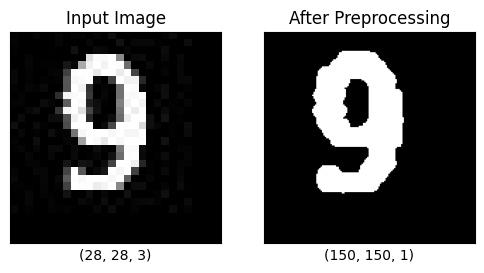

In [29]:
def image_preprocessing_input(image): 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    image = cv2.resize(image, (w, h))
    image = cv2.equalizeHist(image)
    _, binary_image = cv2.threshold(image, 180, 255, cv2.THRESH_BINARY)
    binary_image = binary_image.reshape(w, h, 1)
    binary_image = binary_image / 255.0
    return binary_image

test_image = cv2.imread('/kaggle/input/printed-digits-dataset/assets/9/0_0_1147.jpeg')
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.title('Input Image')
plt.imshow(test_image, cmap='gray')
plt.xlabel(f'{test_image.shape}')
plt.xticks([])
plt.yticks([])

test_image_preprocessed = image_preprocessing_input(test_image)
plt.subplot(1, 2, 2)
plt.title('After Preprocessing')
plt.imshow(test_image_preprocessed, cmap='gray')
plt.xlabel(f'{test_image_preprocessed.shape}')
plt.xticks([])
plt.yticks([])
plt.show()

In [30]:
test_image_preprocessed = np.expand_dims(test_image_preprocessed, axis=0)
test_image_preprocessed.shape

(1, 150, 150, 1)

In [31]:
y_pred = model.predict(test_image_preprocessed)
y_pred_labels = [np.argmax(i) for i in y_pred]
print(f'Prediction for sample: {y_pred_labels}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
Prediction for sample: [9]


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('/kaggle/working/num_classifier_150.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
interpreter = tf.lite.Interpreter(model_path='/kaggle/working/num_classifier_150.tflite')
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

interpreter.set_tensor(input_details[0]['index'], test_image_preprocessed.astype(np.float32))

interpreter.invoke()

y_pred = interpreter.get_tensor(output_details[0]['index'])

y_pred_labels = np.argmax(y_pred, axis=1)

print(f'Prediction for sample: {y_pred_labels}')